In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip "/content/drive/MyDrive/Analytics_vidya_hackfest/Ripik Hackathon Dataset/train.zip"
!unzip "/content/drive/MyDrive/Analytics_vidya_hackfest/Ripik Hackathon Dataset/test.zip"

In [ ]:
#pip install fastai --upgrade

In [ ]:
from fastai.vision.all import *
from fastai.vision.models.convnext import convnext_small_in22k
set_seed(42)

In [ ]:
trn_path = '/content/train/images'
files    = get_image_files(trn_path)
files

(#7200) [Path('/content/train/images/5485.jpg'),Path('/content/train/images/5622.jpg'),Path('/content/train/images/187.jpg'),Path('/content/train/images/4383.jpg'),Path('/content/train/images/3677.jpg'),Path('/content/train/images/5966.jpg'),Path('/content/train/images/383.jpg'),Path('/content/train/images/6903.jpg'),Path('/content/train/images/996.jpg'),Path('/content/train/images/4071.jpg')...]

(897, 672)


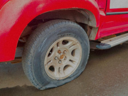

In [ ]:
img = PILImage.create(files[0])
print(img.size)
img.to_thumb(128)

In [ ]:
Train            = pd.read_csv('/content/train/train.csv')
Test             = pd.read_csv('/content/test/test.csv')
damage = Train.label.unique()


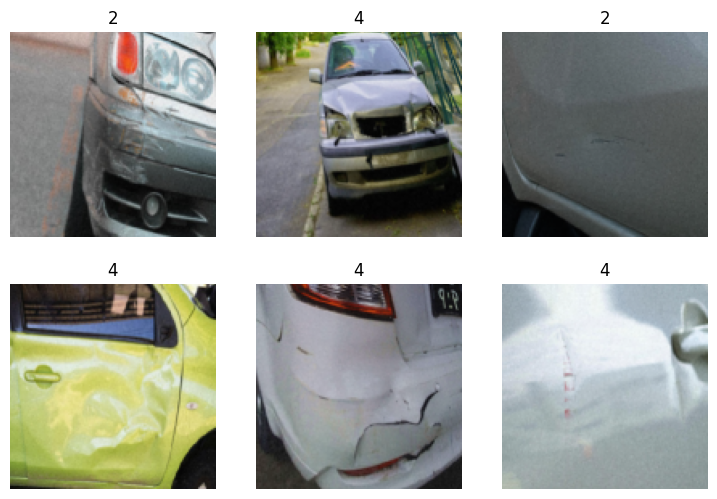

In [ ]:
dblock = DataBlock(blocks = (ImageBlock, CategoryBlock(vocab=damage)),
                   get_x = ColReader('filename', pref = '/content/train/images/'),
                   get_y = ColReader('label'),
                   splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
                   item_tfms = Resize(320, method = 'squish'),
                   batch_tfms = aug_transforms(size = 128, min_scale = 0.75)
                  )

dls = dblock.dataloaders(Train)
dls.show_batch(max_n = 6)

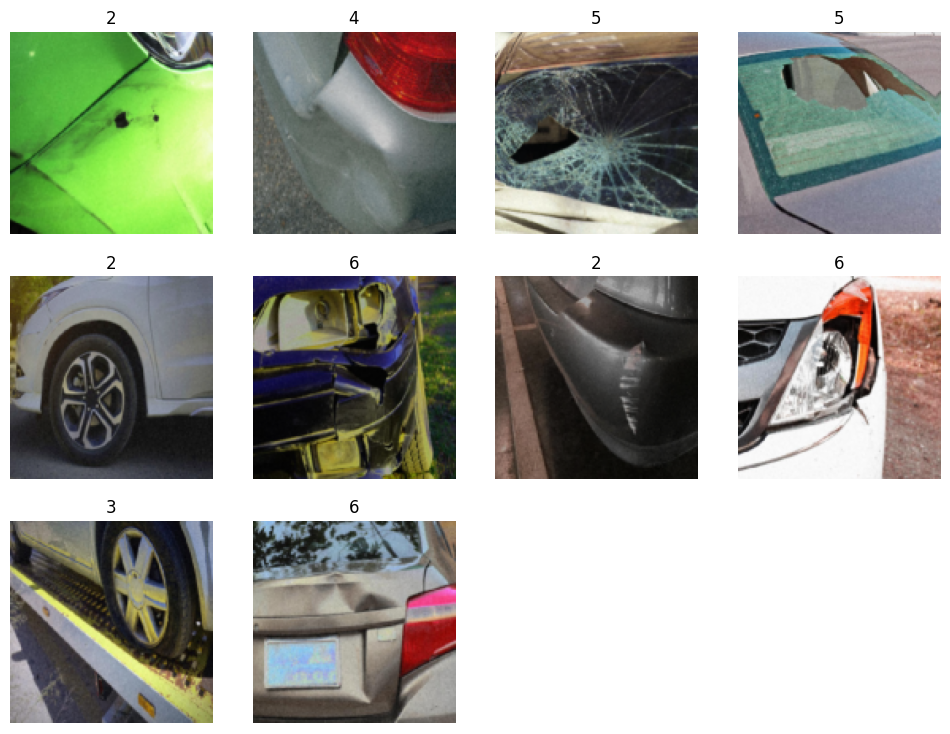

In [ ]:
dls.show_batch(max_n = 10)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=[error_rate,accuracy])
learn.fine_tune(7)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 148MB/s]


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.656863,1.036877,0.319444,0.680556,02:04


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.936583,0.550726,0.183333,0.816667,02:03


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.936583,0.550726,0.183333,0.816667,02:03
1,0.574688,0.364386,0.126389,0.873611,02:08
2,0.350441,0.301294,0.096528,0.903472,02:08
3,0.244627,0.196869,0.064583,0.935417,02:09
4,0.153821,0.147047,0.043750,0.956250,02:08
5,0.094485,0.113024,0.034722,0.965278,02:00
6,0.067539,0.112128,0.031944,0.968056,02:04


In [ ]:
learn = cnn_learner(dls, resnet50, metrics=[error_rate,accuracy])
learn.fine_tune(7)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 89.0MB/s]


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.629218,1.053190,0.317361,0.682639,02:27


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.926302,0.585140,0.206944,0.793056,02:06
1,0.629425,0.417663,0.145139,0.854861,02:07
2,0.427180,0.305050,0.120139,0.879861,02:06
3,0.277906,0.226383,0.075000,0.925000,02:07
4,0.191913,0.182902,0.062500,0.937500,02:13
5,0.145326,0.178544,0.063889,0.936111,02:07
6,0.117265,0.165021,0.059028,0.940972,02:06


In [ ]:
test_dl = learn.dls.test_dl('/content/test/images/' + Test['filename'])
preds , _ = learn.get_preds(dl=test_dl)

In [ ]:
preds

In [ ]:
preds = F.softmax(preds, dim=1)
preds

tensor([[0.1618, 0.1623, 0.1618, 0.1724, 0.1617, 0.1800],
        [0.1613, 0.1907, 0.1610, 0.1649, 0.1610, 0.1610],
        [0.1601, 0.1996, 0.1601, 0.1601, 0.1601, 0.1601],
        ...,
        [0.1604, 0.1967, 0.1604, 0.1617, 0.1604, 0.1604],
        [0.1600, 0.1999, 0.1600, 0.1600, 0.1600, 0.1600],
        [0.1609, 0.1629, 0.1609, 0.1925, 0.1608, 0.1620]])

In [ ]:
preds

tensor([[0.1297, 0.1298, 0.1297, 0.1303, 0.1297, 0.3507],
        [0.1358, 0.2930, 0.1350, 0.1435, 0.1349, 0.1577],
        [0.1307, 0.3417, 0.1306, 0.1356, 0.1306, 0.1307],
        ...,
        [0.1350, 0.1607, 0.1355, 0.2965, 0.1346, 0.1377],
        [0.1296, 0.3520, 0.1296, 0.1296, 0.1296, 0.1296],
        [0.1303, 0.1306, 0.1303, 0.3459, 0.1302, 0.1326]])

In [ ]:
Test

,image_id,filename
0,7201,7201.jpg
1,7202,7202.jpg
2,7203,7203.jpg
3,7204,7204.jpg
4,7205,7205.jpg
...,...,...
4795,11996,11996.jpg
4796,11997,11997.jpg
4797,11998,11998.jpg
4798,11999,11999.jpg


In [ ]:
submission_sf = pd.DataFrame({

    'image_id': Test['image_id'],
    '1': preds[:, 0].squeeze().numpy(),
    '2' : preds[:, 1].squeeze().numpy(),
    '3': preds[:, 2].squeeze().numpy(),
    '4': preds[:, 3].squeeze().numpy(),
    '5': preds[:, 4].squeeze().numpy(),
    '6': preds[:, 5].squeeze().numpy()

})

In [ ]:
submission_sf

,image_id,1,2,3,4,5,6
0,7201,0.161826,0.162330,0.161760,0.172368,0.161692,0.180024
1,7202,0.161329,0.190731,0.160995,0.164945,0.160994,0.161007
2,7203,0.160111,0.199618,0.160057,0.160083,0.160068,0.160063
3,7204,0.160017,0.160017,0.160017,0.160017,0.199917,0.160017
4,7205,0.160018,0.160017,0.160018,0.199911,0.160017,0.160019
...,...,...,...,...,...,...,...
4795,11996,0.160152,0.160405,0.160154,0.160336,0.160151,0.198802
4796,11997,0.160919,0.161448,0.160941,0.191699,0.160983,0.164010
4797,11998,0.160387,0.196740,0.160390,0.161693,0.160386,0.160404
4798,11999,0.160017,0.199913,0.160017,0.160018,0.160017,0.160017


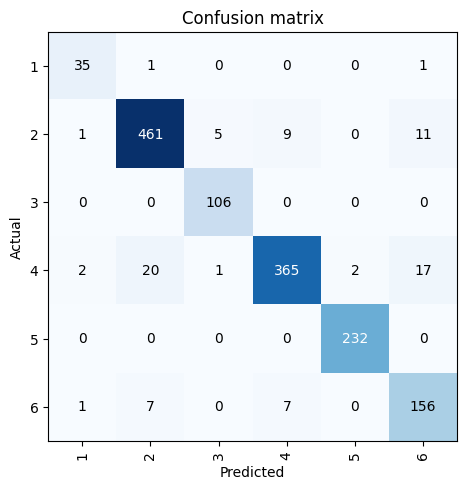

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

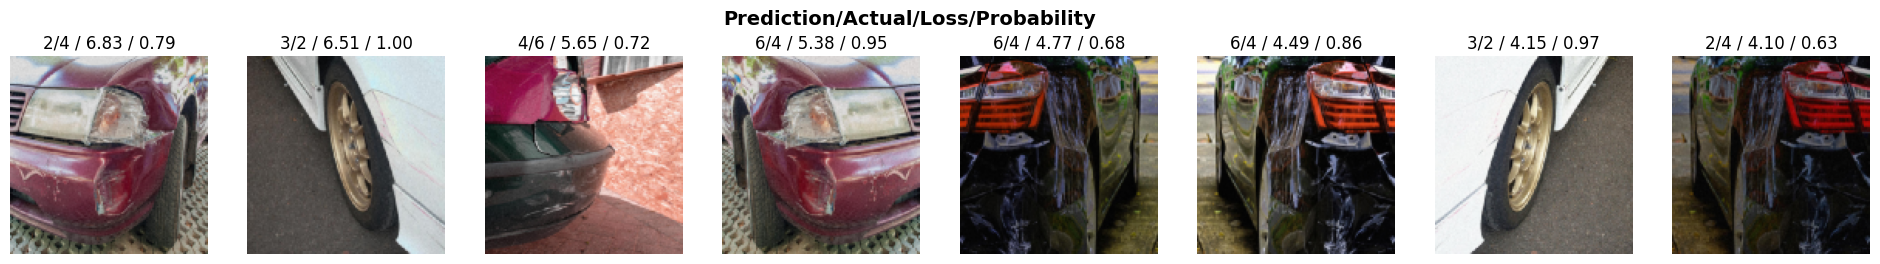

In [ ]:
interp.plot_top_losses(8, nrows=1)

In [ ]:
submission_sf.to_csv('resnet_34_7.csv',index=False)

In [ ]:
predicted_labels_batch = torch.argmax(preds, dim=1).tolist()

In [ ]:
predicted_labels_batch

In [ ]:
predicted_label = torch.argmax(preds)
predicted_label

tensor(248)

In [ ]:
ss = pd.read_csv('/content/sample_submission-3.csv')
ss['label'] = actual_labels

In [ ]:
Test

,image_id,filename
0,7201,7201.jpg
1,7202,7202.jpg
2,7203,7203.jpg
3,7204,7204.jpg
4,7205,7205.jpg
...,...,...
4795,11996,11996.jpg
4796,11997,11997.jpg
4797,11998,11998.jpg
4798,11999,11999.jpg


In [ ]:
ss

,image_id,label
0,7201,6
1,7202,2
2,7203,2
3,7204,5
4,7205,4
...,...,...
4795,11996,6
4796,11997,4
4797,11998,4
4798,11999,2


In [ ]:
Train.label.value_counts()

2    2349
4    2079
5    1185
6     882
3     534
1     171
Name: label, dtype: int64

In [ ]:
damage

array([2, 4, 3, 5, 6, 1])

In [ ]:
ss['label'] = ss['label'] + 1

In [ ]:
ss.label.value_counts()

2    1561
4    1394
5     812
6     611
3     375
1      47
Name: label, dtype: int64

In [ ]:
ss.label.value_counts()

2    1627
4    1269
5     824
6     625
3     405
1      50
Name: label, dtype: int64

In [ ]:
label_map = {i: label for i, label in enumerate(dls.vocab)}
actual_labels = [label_map[label] for label in predicted_labels_batch ]

print(actual_labels)

[6, 2, 2, 5, 4, 4, 4, 5, 6, 6, 5, 4, 5, 2, 2, 6, 4, 3, 4, 2, 4, 2, 3, 2, 4, 4, 4, 4, 2, 4, 5, 2, 4, 5, 2, 4, 2, 4, 4, 4, 2, 3, 2, 5, 1, 4, 4, 5, 5, 4, 2, 5, 4, 2, 6, 3, 3, 6, 2, 3, 1, 2, 4, 4, 2, 2, 3, 5, 2, 3, 2, 4, 4, 5, 2, 4, 5, 2, 2, 2, 5, 5, 5, 5, 2, 5, 4, 5, 4, 6, 6, 3, 4, 2, 3, 4, 2, 2, 2, 2, 2, 5, 5, 5, 4, 2, 2, 4, 4, 2, 3, 5, 4, 5, 5, 4, 6, 6, 2, 5, 2, 6, 4, 6, 4, 2, 2, 5, 3, 2, 5, 4, 4, 2, 6, 2, 3, 5, 2, 4, 5, 4, 2, 5, 4, 2, 4, 5, 4, 2, 4, 4, 4, 6, 6, 4, 3, 5, 5, 5, 2, 2, 4, 4, 4, 5, 4, 4, 4, 2, 6, 4, 5, 6, 2, 4, 6, 4, 2, 6, 6, 6, 2, 4, 4, 5, 4, 5, 5, 3, 6, 5, 2, 6, 2, 4, 3, 6, 2, 4, 2, 4, 4, 4, 4, 6, 2, 2, 2, 2, 5, 5, 3, 5, 3, 6, 2, 4, 5, 3, 4, 5, 6, 2, 2, 6, 2, 4, 2, 4, 4, 5, 5, 4, 2, 2, 3, 6, 3, 4, 2, 3, 6, 6, 2, 5, 2, 4, 4, 4, 6, 3, 2, 2, 2, 2, 2, 3, 5, 4, 2, 6, 4, 5, 5, 2, 4, 6, 4, 5, 5, 2, 3, 3, 4, 6, 4, 2, 4, 4, 2, 5, 6, 6, 5, 2, 3, 4, 5, 4, 6, 3, 2, 1, 4, 2, 6, 2, 4, 3, 3, 4, 5, 5, 4, 4, 5, 4, 3, 4, 2, 5, 4, 3, 4, 6, 2, 4, 4, 2, 2, 3, 3, 5, 6, 5, 6, 4, 2, 6, 4, 4, 2, 

In [ ]:
ss.to_csv('ff_corrected_res34.csv',index=False)

In [ ]:
pip install timm


In [ ]:
import timm

In [ ]:
learn = vision_learner(dls, 'resnet26d', loss_func = nn.CrossEntropyLoss(), metrics=accuracy).to_fp16()

In [ ]:
!mv  /content/test '/content/inputs'

In [ ]:
!mkdir 'inputs'

In [ ]:
!zip -r a_v.zip /content/inputs

In [ ]:
kaggle_folder = '/root/.kaggle'  # Kaggle directory in Colab
kaggle_data_path = os.path.join(kaggle_folder, 'a_v.zip')

# Copy the zip file to the Kaggle directory
!cp '/content/a_v.zip' "$kaggle_data_path"


In [ ]:
!pip install kaggle

# Replace 'path/to/your/kaggle.json' with the path to your Kaggle API token
!mkdir -p /root/.kaggle
!cp '/content/kaggle.json' /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
!kaggle datasets init -p "$kaggle_folder"

Data package template written to: /root/.kaggle/dataset-metadata.json


In [ ]:
!kaggle datasets create -p "$kaggle_folder" --dir-mode zip


Default slug detected, please change values before uploading


In [ ]:
!mkdir ../root/.kaggle
!touch ../root/.kaggle/kaggle.json
!echo '{"username":"jojushaji","key":"2f6bd9e0b322ac3c842f64fe276e96f4"}' >> ../root/.kaggle/kaggle.json
!chmod 600 ../root/.kaggle/kaggle.json
!cat ../root/.kaggle/kaggle.json

{"username":"jojushaji","key":"2f6bd9e0b322ac3c842f64fe276e96f4"}


In [ ]:
# Replace '/content/drive/MyDrive/YourDatasetFolder' with the path to your dataset
path = Path('/content/inputs/train')

# Replace 'YourDataset.csv' with the actual CSV file containing labels
data = ImageDataLoaders.from_csv(path, csv_fname='train.csv', folder='train', item_tfms=Resize(460), bs=64)


In [ ]:
!mkdir -p ~/.kaggle
!touch ~/.kaggle.json
!echo '{"username":"jojushaji","key":"2f6bd9e0b322ac3c842f64fe276e96f4"}' >> ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!cat ~/.kaggle.json

In [ ]:
!chmod 600 ~/kaggle.json
!cat ~/.kaggle.json

chmod: cannot access '/root/kaggle.json': No such file or directory
cat: /root/.kaggle.json: No such file or directory


In [ ]:
!pip install -q kaggle

# Make a directory named kaggle and copy the Kaggle API token into it
#!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!mkdir -p /root/.kaggle
!echo '{"username":"jojushaji","key":""2f6bd9e0b322ac3c842f64fe276e96f4"}' > /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!cat /root/.kaggle/kaggle.json

{"username":"jojushaji","key":""2f6bd9e0b322ac3c842f64fe276e96f4"}


In [ ]:
%cd /content/inputs
!kaggle datasets init

/content/inputs
Data package template written to: /content/inputs/dataset-metadata.json


In [ ]:
Default slug detected, please change values before uploading

In [ ]:
!kaggle datasets create

Default slug detected, please change values before uploading


In [ ]:
Train.head()

,image_id,filename,label
0,1,1.jpg,2
1,2,2.jpg,4
2,3,3.jpg,2
3,4,4.jpg,3
4,5,5.jpg,5


In [ ]:
Train.label.value_counts()

2    2349
4    2079
5    1185
6     882
3     534
1     171
Name: label, dtype: int64

In [ ]:
Train.damage.value_counts()

In [ ]:
from fastcore.parallel import *

In [ ]:
from fastcore.parallel import *
def f(o): return PILImage.create(o).size
sizes = parallel(f, files, n_workers=8)
pd.Series(sizes).value_counts()

In [ ]:
Train[Train.filename=='images3497.jpg']

In [ ]:
Train.head(2)

,image_id,filename,label
0,1,1.jpg,2
1,2,2.jpg,4


In [ ]:
def train(arch,item,batch,epochs=4):
    dblock = DataBlock(blocks = (ImageBlock, CategoryBlock(vocab=damage)),
                       get_x = ColReader('filename', pref = '/content/train/images/'),
                       get_y = ColReader('label'),
                       splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
                       item_tfms = item, #Resize(320, method = 'squish'),
                       batch_tfms = batch #aug_transforms(size = 128, min_scale = 0.75)
                      )

    dls = dblock.dataloaders(Train)
    #dls.show_batch(max_n = 6)
    learn = vision_learner(dls, arch, loss_func = nn.CrossEntropyLoss(), metrics=accuracy).to_fp16()
    learn.fine_tune(epochs,  0.01)
    return learn

In [ ]:
train('resnet26d',Resize(256, method = 'squish'),aug_transforms(size = 224, min_scale = 0.75))

In [ ]:
train('convnext_small_in22k',Resize(256, method = 'squish'),aug_transforms(size = 224, min_scale = 0.75))

In [ ]:
train('vit_small_patch16_224',Resize(256, method = 'squish'),aug_transforms(size = 224, min_scale = 0.75))

In [ ]:
train('convnext_small_in22k',Resize(256),aug_transforms(size = 224, min_scale = 0.75))

In [ ]:
train('convnext_small_in22k',Resize(256,ResizeMethod.Pad,pad_mode=PadMode.Zeros),aug_transforms(size = 224, min_scale = 0.75))

In [ ]:
learn = train('convnext_small_in22k',Resize(480),aug_transforms(size = 320, min_scale = 0.75),epochs=6)

In [ ]:
test_dl = learn.dls.test_dl('/kaggle/input/zindidata/images/images/' + Test['filename'])
preds , _ = learn.get_preds(dl=test_dl)

In [ ]:
preds = F.softmax(preds, dim=1)

In [ ]:
damage

In [ ]:
damage, learn.dls.vocab

In [ ]:
submission_sf = pd.DataFrame({

    'ID': Test['ID'],
    'DR': preds[:, 0].squeeze().numpy(),
    'G' : preds[:, 1].squeeze().numpy(),
    'ND': preds[:, 2].squeeze().numpy(),
    'WD': preds[:, 3].squeeze().numpy(),
    'other': preds[:, 4].squeeze().numpy(),
})

In [ ]:
submission_sf.head(50)

In [ ]:
Train.damage.value_counts()

In [ ]:
submission_sf.to_csv('new_img.csv', index=False)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()